In [ ]:
from fetchnews import fetch_google_news
from fetchnews import sentiment_analysis
from analytics import time_series_sentiment, sentiment_returns_analysis


import pandas as pd
import numpy as np
from pygooglenews import GoogleNews
import warnings
warnings.filterwarnings('ignore')

from transformers import pipeline
import matplotlib.pyplot as plt

In [8]:
query = "Netflix"
start_date = "2025-09-01"
end_date = "2025-12-25"


Function sentiment_analysis takes in:

1) query: The target keyword
2) start_date
3) end_date
4) label/score: label gives "POSITIVE" or "NEGATIVE"; score gives a confidence score for "POSITIVE" sentiment.

and gives out a dataframe with the top news and sentiment scores/labels for each day



In [9]:
df = sentiment_analysis(query,start_date,end_date,"label")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [10]:
df

,2025-9-1,2025-9-2,2025-9-3,2025-9-4,2025-9-5,2025-9-6,2025-9-7,2025-9-8,2025-9-9,2025-9-10,...,2025-12-16 Analysis,2025-12-17 Analysis,2025-12-18 Analysis,2025-12-19 Analysis,2025-12-20 Analysis,2025-12-21 Analysis,2025-12-22 Analysis,2025-12-23 Analysis,2025-12-24 Analysis,2025-12-25 Analysis
0,The Best New TV Shows Streaming In September 2...,Who buys Warner and who stops it? Netflix-Para...,'Unknown Number: The High School Catfish' shoc...,‘Cover-Up’ Review: Seymour Hersh and the Secre...,NFL: Cowboys beat Commanders as Netflix pull o...,10 Great Movies New To Netflix In September 20...,Paramount Launches Hostile Bid Offer to Kill N...,Is the Netflix-Warner Bros. deal a sure thing?...,"Tom Brady talks Netflix roast, 'most rewarding...",Stranger Things Season 5 Vol 2 Review and Rele...,...,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,NEGATIVE
1,Trump comments raise doubts over Netflix's $72...,11 Best New Movies on Netflix: September 2025’...,Netflix will let users customize and share cli...,Sneak Peek: Netflix House Begins Work On Massi...,A new Netflix doc offers an intimate portrait ...,Warner Bros. Board Poised to Back Netflix as P...,Netflix September 2025 Release Guide: Must-Wat...,How about Edge of Tomorrow on repeat forever -...,"Video: ""Dudes"" - Official Trailer - Netflix - ...","Single’s Inferno 5 Airing January 20, Netflix’...",...,POSITIVE,POSITIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE
2,Netflix Unveils Evolution of K-Unscripted: New...,Trump Just Threw a Wrench Into Netflix's $72 B...,All the new movies and TV shows streaming in S...,Streaming Platforms Continue to Bet Big on Gam...,Commentary: Why is Meghan Markle wasting her t...,The Best Movies and TV Shows Coming to Netflix...,Charlie Sheen Is Ready to Tell You Everything ...,‘Wednesday’ Season 3 Needs To Break Netflix’s ...,‘The Rip’: Matt Damon & Ben Affleck Lead Netfl...,Netflix Adds Amazon Ads To DSP Partners 09/10/...,...,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
3,"Raw results, Sept. 1, 2025: Jimmy Uso rescues ...",Girl band v demons: the secrets of Netflix’s m...,Netflix updates its Moments feature to give us...,'Wednesday' co-creators promise a speedy deliv...,1 Reason Wall Street Is Obsessed With Netflix ...,Adaptation Of Hugely Popular Video Game Series...,Paul-Davis fight off after lawsuit against Dav...,"Raw results, Sept. 8, 2025: Jey Uso delivers a...",Netflix slates horror-themed “Nightmares of Na...,Everything You Need to Know About ‘Black Rabbi...,...,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,NEGATIVE
4,What happens next in Netflix's discrimination ...,Fact Check: NO Evidence George Strait Signed $...,Netflix Moments Feature Gets Major Update for ...,A Tame Hostage - Splice Today,"SmackDown: Sept. 5, 2025 - WWE",Nick Ut Speaks Out After Netflix Buys Doc Chal...,Stream It Or Skip It: ‘Inspector Zende’ on Net...,"Video: ""Dr. Seuss's Horton!"" New Series Traile...","Canelo Alvarez vs Terence Crawford fight date,...",Netflix in exclusive talks to buy Warner Bros ...,...,POSITIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE,NEGATIVE,POSITIVE,POSITIVE,POSITIVE,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NEGATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Function time_series_sentiment takes in:

1) a dataframe output from sentiment_analysis
2) query for title input
3) SMA day count

and gives out a time series for % positive for the news and related plots.

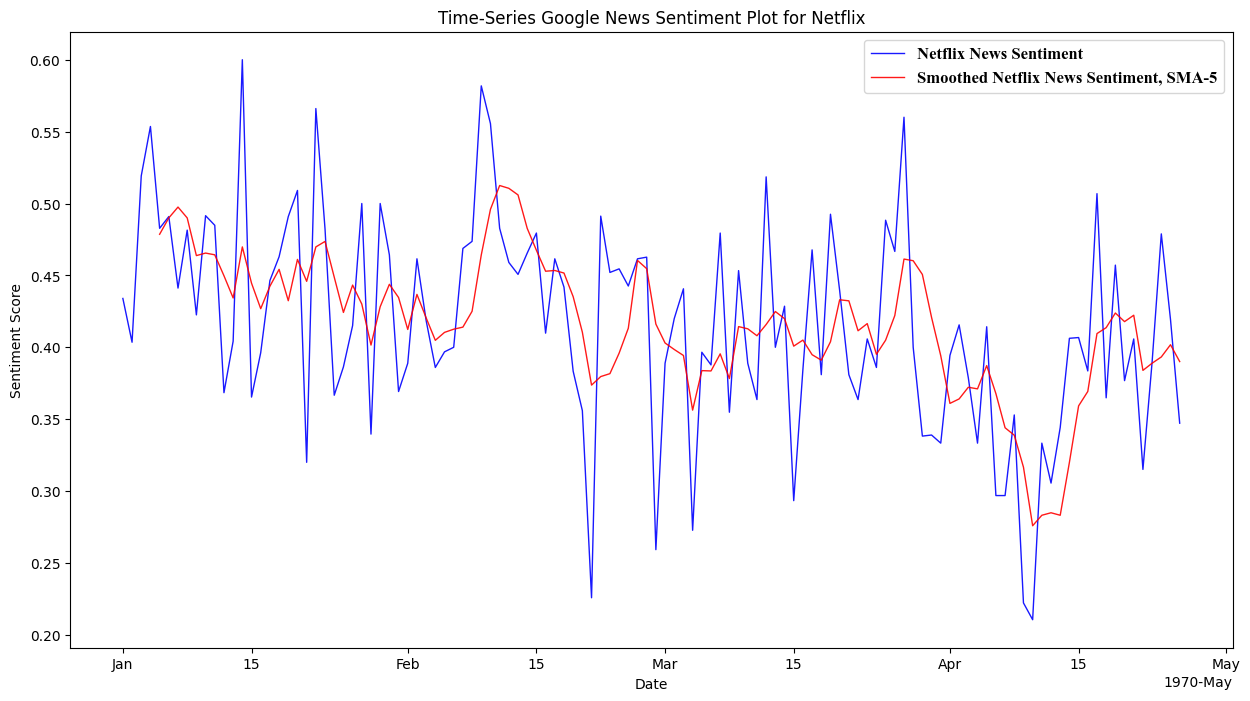

In [11]:
time_series = time_series_sentiment(df,query,5)

Function sentiment_returns_analysis takes in:

1) Target asset ticker code for comparison
2) time series fed out

and plots a graph to show the relationship between news sentiment and the asset returns.
Pearson correlation coefficient is given to reflect linear correlation between the two variables.

[*********************100%***********************]  1 of 1 completed


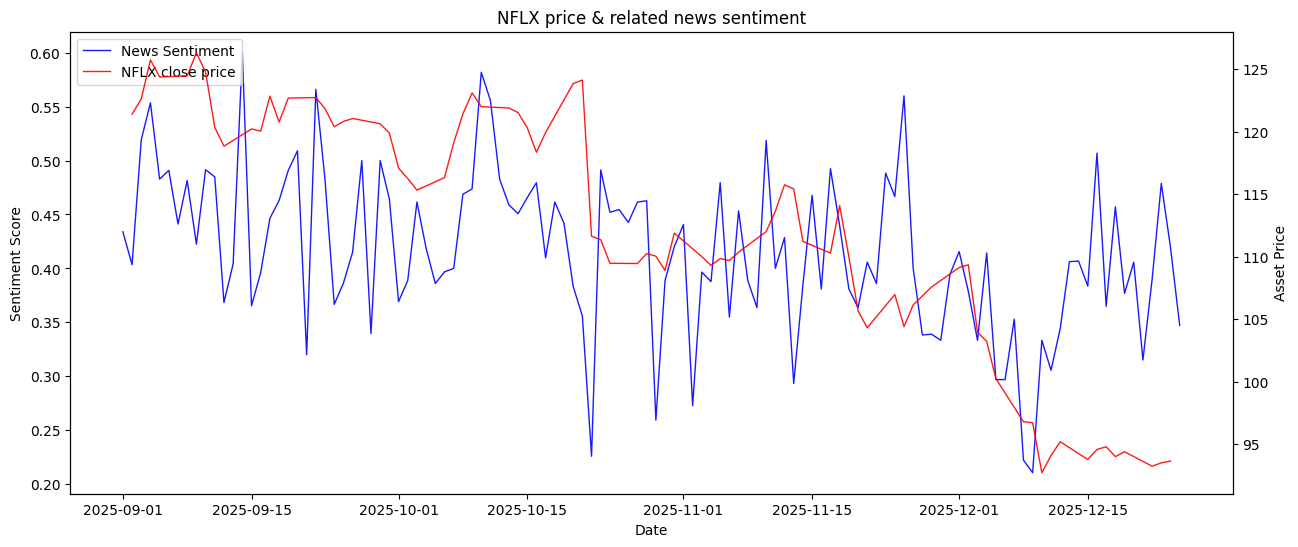

Correlation: 0.3953


,stock,sentiment
2025-09-02,121.411003,0.403509
2025-09-03,122.617996,0.519231
2025-09-04,125.748001,0.553571
2025-09-05,124.382004,0.482759
2025-09-08,124.475998,0.481481
...,...,...
2025-12-18,94.000000,0.457143
2025-12-19,94.389999,0.376812
2025-12-22,93.230003,0.389831
2025-12-23,93.500000,0.478873


In [12]:
ticker = "NFLX"
sentiment_returns_analysis(time_series, ticker)